# **Exploratory Data Analysis of Startups As of June, 2021**  

**What is a Unicorn Company?**  
- A unicorn company or unicorn startup, is a private company with a valuation $\ge \$1\;\text{billion}$.  
- As of June 2021, there are more than $700$ unicorns around the world.  
- Popular former unicorns include AirBNB, Facebook and Google.  
- Variants include a decacorn refers to those firms whose value $ \ge \$10\; \text{billion}$, and a hectocorn which refers to those firms whose value $\ge \$100 \; \text{billion}$.  

**NOTE:** For this analysis the data is extracting from an HTML table present in the following website: https://www.cbinsights.com/research-unicorn-companies.

In [1]:
!python3 -m pip install --upgrade -r requirements.txt

Requirement already up-to-date: missingno in /home/striker/.local/lib/python3.8/site-packages (from -r requirements.txt (line 1)) (0.5.0)
Requirement already up-to-date: plotly in /home/striker/.local/lib/python3.8/site-packages (from -r requirements.txt (line 2)) (5.1.0)
Requirement already up-to-date: chart-studio in /home/striker/.local/lib/python3.8/site-packages (from -r requirements.txt (line 3)) (1.1.0)


In [2]:
import os
import sys

import math
import numpy as np
import pandas as pd

import missingno as msno
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 300
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio
import chart_studio.plotly as py

if "DESKTOP_SESSION" not in os.environ:
    from google.colab import drive
    drive.mount("/content/gdrive/")

In [3]:
USERNAME = "black_rock_"
CHART_STUDIO_API_KEY = "KAuB8YSGmhnCusg1GJGX"

chart_studio.tools.set_credentials_file(username = USERNAME, api_key = CHART_STUDIO_API_KEY)

In [4]:
PROJ_ROOT_DIR = os.path.abspath("./")
HTML_FILE_PATH = os.path.join(PROJ_ROOT_DIR, "the_complete_list_of_unicorn_companies_as_of_june_2021.html")

TOP_OBSERVATIONS = 15

In [5]:
startup_df = pd.read_html(HTML_FILE_PATH, parse_dates = ["Date Joined"])[0]
startup_df.columns = ["company_name", "valuation_billion_dollars", "joined_date", "country", "city_or_metro", "industry", "top_investors"]
startup_df.company_name = startup_df.company_name.str.strip()
startup_df.valuation_billion_dollars = startup_df.valuation_billion_dollars.str.replace("$", "").apply(lambda curr_value: round(float(curr_value), 3))
startup_df['joined_year'] = startup_df.joined_date.dt.year.astype(np.int16)
startup_df.industry = startup_df.industry.str.strip(" \t><").str.title().str.replace("Fintech", "FinTech").str.replace("Edtech", "EdTech")
startup_df.top_investors = startup_df.top_investors.str.strip()
startup_df.city_or_metro = startup_df.city_or_metro.str.strip().str.replace("Gurugram", "Gurgaon")
startup_df

company_name  valuation_billion_dollars joined_date        country  \
0      Bytedance                      140.0  2017-04-07          China   
1         Stripe                       95.0  2014-01-23  United States   
2         SpaceX                       74.0  2012-12-01  United States   
3         Klarna                       45.6  2011-12-12         Sweden   
4      Instacart                       39.0  2014-12-30  United States   
..           ...                        ...         ...            ...   
738       Ynsect                        1.0  2019-02-21         France   
739   Yunxuetang                        1.0  2021-03-29          China   
740     Zhaogang                        1.0  2017-06-29          China   
741  Zhuan Zhuan                        1.0  2017-04-18          China   
742        Zwift                        1.0  2020-09-16  United States   

     city_or_metro                             industry  \
0          Beijing              Artificial Intelligence   
1    San Francisco                              FinTech   
2        Hawthorne                                Other   
3        Stockholm                              FinTech   
4    San Francisco  Supply Chain, Logistics, & Delivery   
..             ...                                  ...   
738           Evry                                Other   
739         Suzhou                               EdTech   
740       Shanghai      E-Commerce & Direct-To-Consumer   
741        Beijing      E-Commerce & Direct-To-Consumer   
742     Long Beach      E-Commerce & Direct-To-Consumer   

                                         top_investors  joined_year  
0    Sequoia Capital China, SIG Asia Investments, S...         2017  
1          Khosla Ventures, LowercaseCapital, capitalG         2014  
2    Founders Fund, Draper Fisher Jurvetson, Rothen...         2012  
3    Institutional Venture Partners, Sequoia Capita...         2011  
4    Khosla Ventures, Kleiner Perkins Caufield & By...         2014  
..                                                 ...          ...  
738  Astanor Ventures, Upfront Ventures, IDInvest P...         2019  
739  Matrix Partners China, Sequoia Capital China, ...         2021  
740    K2 Ventures, Matrix Partners China, IDG Capital         2017  
741                           58.com, Tencent Holdings         2017  
742    Novator Partners, True, Causeway Media Partners         2020  

[743 rows x 8 columns]

In [6]:
startup_df['startup_category'] = pd.cut(startup_df.valuation_billion_dollars, 
                                        bins = (0, 9, 99, 200), 
                                        labels = ('Unicorn', 'Decacorn', 'Hectocorn'))

In [7]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   company_name               743 non-null    object        
 1   valuation_billion_dollars  743 non-null    float64       
 2   joined_date                743 non-null    datetime64[ns]
 3   country                    743 non-null    object        
 4   city_or_metro              736 non-null    object        
 5   industry                   743 non-null    object        
 6   top_investors              742 non-null    object        
 7   joined_year                743 non-null    int16         
 8   startup_category           743 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(1), int16(1), object(5)
memory usage: 43.0+ KB


<AxesSubplot:>

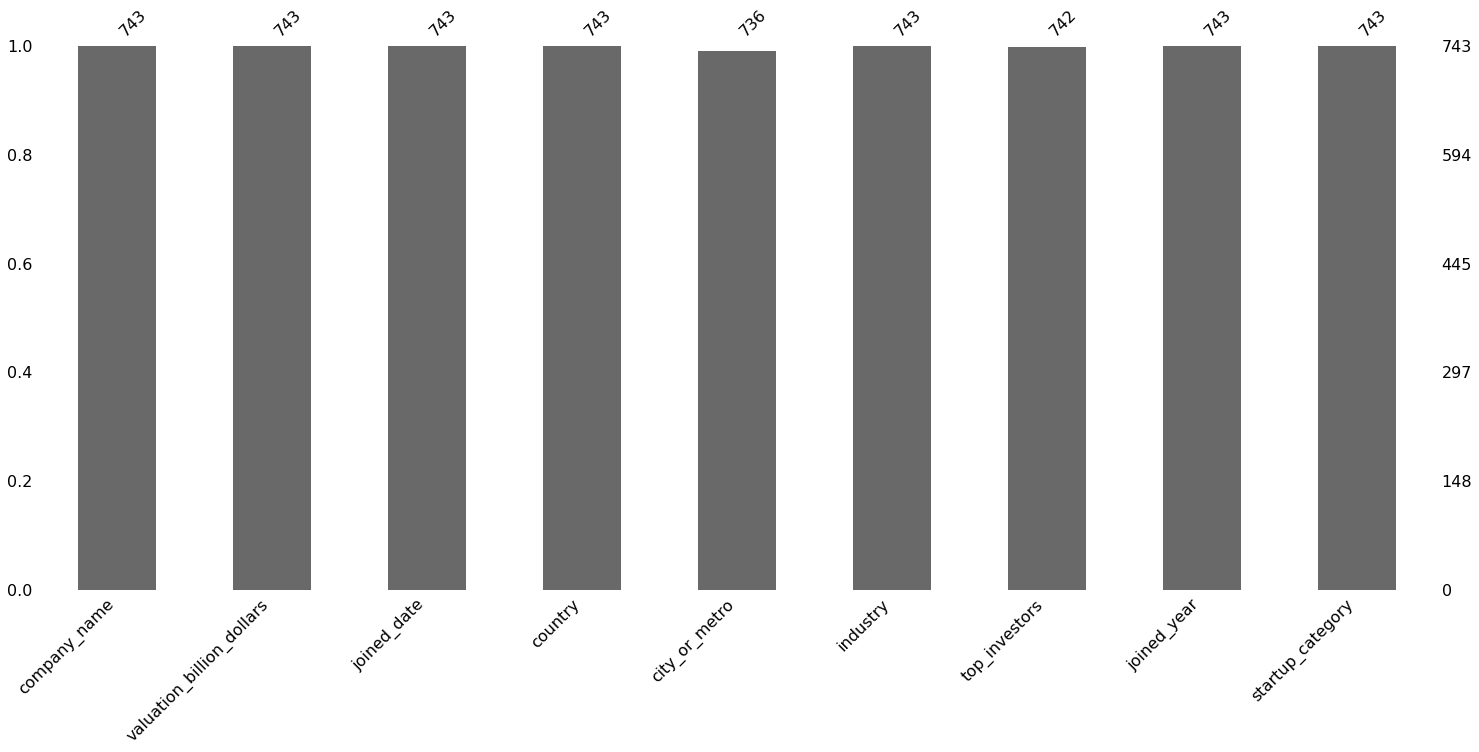

In [8]:
msno.bar(startup_df)

In [9]:
startup_df.loc[startup_df.city_or_metro.isnull()]

company_name  valuation_billion_dollars joined_date    country  \
141    HyalRoute                        3.5  2020-05-26  Singapore   
456         Trax                        1.3  2019-07-22  Singapore   
519  Amber Group                        1.1  2021-06-21  Hong Kong   
579        Carro                        1.0  2021-06-14  Singapore   
664       Moglix                        1.0  2021-05-17  Singapore   
681      PatSnap                        1.0  2021-03-16  Singapore   
733        WeLab                        1.0  2017-11-08  Hong Kong   

    city_or_metro                         industry  \
141           NaN      Mobile & Telecommunications   
456           NaN          Artificial Intelligence   
519           NaN                          FinTech   
579           NaN  E-Commerce & Direct-To-Consumer   
664           NaN  E-Commerce & Direct-To-Consumer   
681           NaN     Internet Software & Services   
733           NaN                          FinTech   

                                         top_investors  joined_year  \
141                                          Kuang-Chi         2020   
456  Hopu Investment Management, Boyu Capital, DC T...         2019   
519  Tiger Global Management, Tiger Brokers, DCM Ve...         2021   
579  SingTel Innov8, Alpha JWC Ventures, Golden Gat...         2021   
664            Jungle Ventures, Accel, Venture Highway         2021   
681  Sequoia Capital China, Shunwei Capital Partner...         2021   
733  Sequoia Capital China, ING, Alibaba Entreprene...         2017   

    startup_category  
141          Unicorn  
456          Unicorn  
519          Unicorn  
579          Unicorn  
664          Unicorn  
681          Unicorn  
733          Unicorn

In [10]:
startup_df.loc[startup_df.company_name == "HyalRoute", "city_or_metro"] = "Central Region Singapore"
startup_df.loc[startup_df.company_name == "Trax", "city_or_metro"] = "Central Region Singapore"
startup_df.loc[startup_df.company_name == "Carro", "city_or_metro"] = "Central Region Singapore"
startup_df.loc[startup_df.company_name == "Moglix", "city_or_metro"] = "Central Region Singapore"
startup_df.loc[startup_df.company_name == "PatSnap", "city_or_metro"] = "Central Region Singapore"
startup_df.loc[startup_df.company_name == "Amber Group", "city_or_metro"] = "Hong Kong Island"
startup_df.loc[startup_df.company_name == "WeLab", "city_or_metro"] = "Hong Kong Island"

In [11]:
startup_df.loc[startup_df.top_investors.isnull()]

company_name  valuation_billion_dollars joined_date country  \
649  LinkSure Network                        1.0  2015-01-01   China   

    city_or_metro                     industry top_investors  joined_year  \
649      Shanghai  Mobile & Telecommunications           NaN         2015   

    startup_category  
649          Unicorn

In [12]:
startup_df.loc[startup_df.company_name == "LinkSure Network", "top_investors"] = "Bank of China Group Investment, Eight Roads, Orchid Asia Group Management, Primavera Capital Group, Cheetah Mobile"

In [13]:
startup_df.to_csv(os.path.join(PROJ_ROOT_DIR, "unicorn_data_as_of_june_2021.csv"), index = False)

In [14]:
pie_color_palette = ["#0C1129", "#2728CA", "#006DE4", "#AEAEB5", "#F2F0E9"]

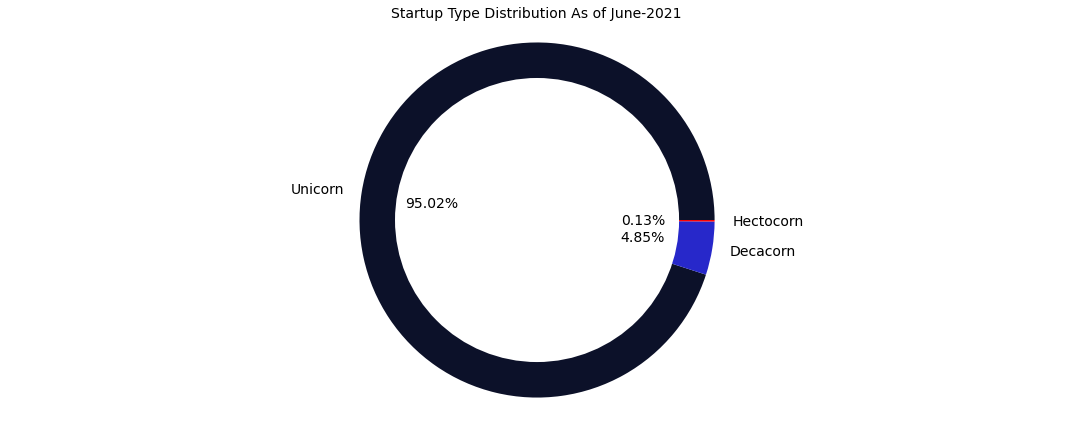

In [53]:
plt.figure(figsize = (15, 6))
plt.title("Startup Type Distribution As of June-2021", fontdict = dict(fontsize = 14))
plt.pie(startup_df.startup_category.value_counts(), 
        labels = startup_df.startup_category.value_counts().index, 
        autopct = "%0.2f%%", 
        colors = ["#0C1129", "#2728CA", "red"], 
        textprops = dict(fontsize = 14))
centre_circle = plt.Circle(xy = (0, 0), radius = 0.80, fc = "white")
plt.gca().add_artist(centre_circle)
plt.axis("equal")
plt.tight_layout()
sns.despine()

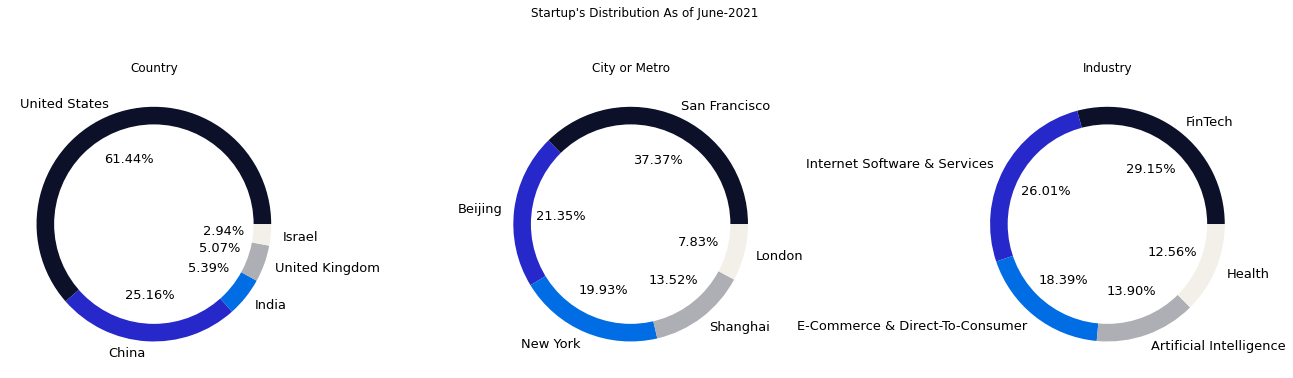

In [52]:
fig, axes = plt.subplots(ncols = 3, figsize = (18, 5))
fig.suptitle("Startup's Distribution As of June-2021", fontdict = dict(fontsize = 18, weight = "bold"), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["Country", "City or Metro", "Industry"], [startup_df.country.value_counts()[:5], startup_df.city_or_metro.value_counts()[:5], startup_df.industry.value_counts()[:5]]):
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.85, fc = "white")
    curr_axis.pie(curr_data, 
                labels = curr_data.index,
                autopct = "%0.2f%%", 
                colors = pie_color_palette, 
                textprops = dict(fontsize = 13))
    curr_axis.add_artist(centre_circle)
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
fig.tight_layout()
sns.despine()

In [17]:
startup_df.industry.value_counts()

FinTech                                130
Internet Software & Services           116
E-Commerce & Direct-To-Consumer         82
Artificial Intelligence                 62
Health                                  56
Other                                   50
Supply Chain, Logistics, & Delivery     38
Mobile & Telecommunications             36
Auto & Transportation                   31
Cybersecurity                           30
Hardware                                27
Data Management & Analytics             26
EdTech                                  24
Consumer & Retail                       21
Travel                                  13
Education                                1
Name: industry, dtype: int64

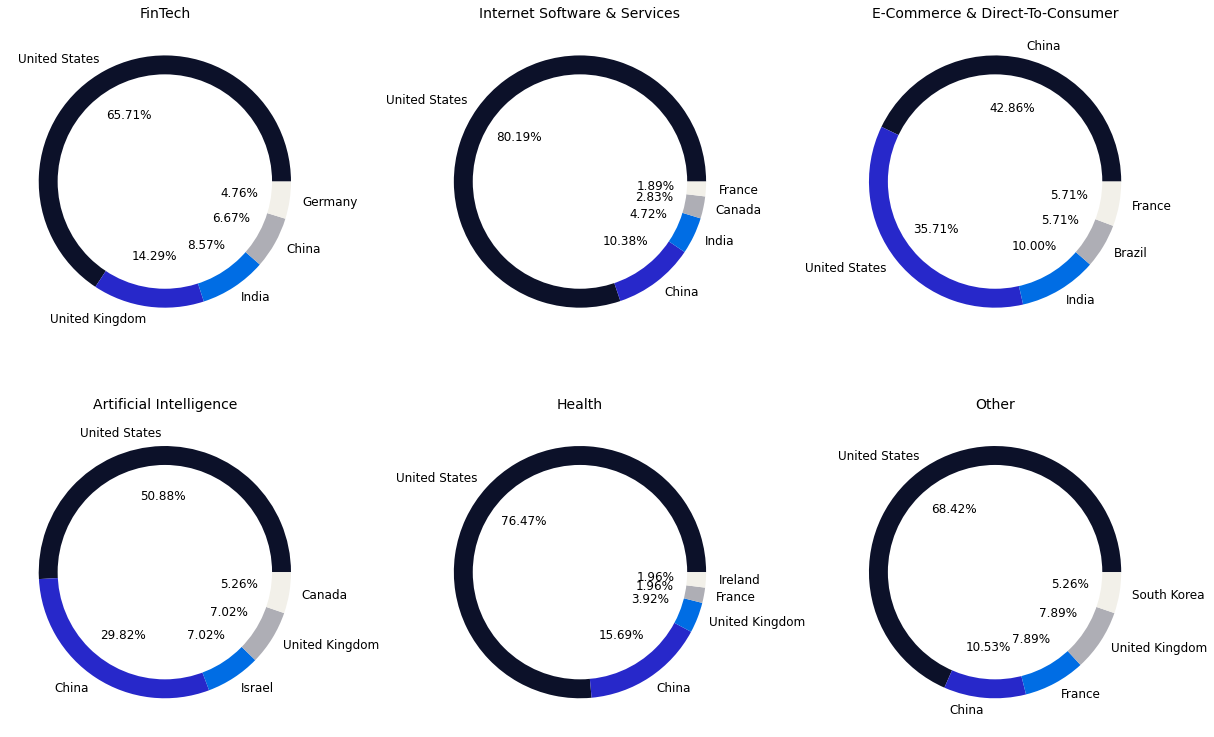

In [51]:
startup_groupby_industry = startup_df.groupby(by = ["industry"])

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (17, 11))

for curr_industry_name, curr_axis in zip(startup_df.industry.value_counts()[:6].index, axes.flatten()):
    curr_industry_countrywise_stats = startup_groupby_industry.get_group(curr_industry_name).reset_index(drop = True).country.value_counts()[:5]
    curr_axis.pie(curr_industry_countrywise_stats, 
                  labels = curr_industry_countrywise_stats.index, 
                  autopct = "%0.2f%%",
                  colors = pie_color_palette, 
                  textprops = dict(fontsize = 12))
    curr_axis.set_title(curr_industry_name, fontdict = dict(fontsize = 14))
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.85, fc = "white")
    curr_axis.add_artist(centre_circle)
fig.tight_layout()
sns.despine()

In [19]:
startup_treemap_plot = px.treemap(startup_df, 
                                  path = [px.Constant('World'), 'country', 'city_or_metro', 'industry', 'company_name'], 
                                  values = 'valuation_billion_dollars',
                                  color = 'valuation_billion_dollars', 
                                  title = "Detailed Startup's Distribution As of June-2021 By Geography",
                                  color_continuous_scale = 'RdBu',
                                  template = 'plotly_white')
startup_treemap_plot.update_traces(hovertemplate = None)
startup_treemap_plot.update_layout(margin = dict(l = 25, r = 25), 
                                   uniformtext = dict(minsize = 15), 
                                   coloraxis_colorbar = dict(title = "Valuation"))
startup_treemap_plot.show()

In [20]:
startup_treemap_industry_plot = px.treemap(startup_df, path = [px.Constant("World"), 'industry', 'company_name'], 
                                           values = 'valuation_billion_dollars', 
                                           color = 'valuation_billion_dollars', 
                                           title = "Detailed Startup's Distribution As of June-2021 By Industry",
                                           color_continuous_scale = "RdBu", 
                                           template = 'plotly_white')
startup_treemap_industry_plot.update_traces(hovertemplate = None)
startup_treemap_industry_plot.update_layout(margin = dict(l = 25, r = 25), 
                                            uniformtext = dict(minsize = 10), 
                                            coloraxis_colorbar = dict(title = "Valuation"))
startup_treemap_industry_plot.show()

In [21]:
startup_yearwise_stats = startup_df.joined_year.value_counts()
startup_yearwise_plot = px.bar(x = startup_yearwise_stats.index, 
                               y = startup_yearwise_stats,
                               labels = dict(x = 'Year', y = "Startup's Count"),
                               title = "Year Wise Total Startup's As of June 2021",
                               text = startup_yearwise_stats,
                               template = 'plotly_white')
startup_yearwise_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                    hovertemplate = None, 
                                    hoverinfo = "skip", 
                                    texttemplate = "%{text}", 
                                    textposition = "outside")
startup_yearwise_plot.show()

In [22]:
startup_countrywise_stats = startup_df.country.value_counts()
startup_countrywise_plot = px.bar(x = startup_countrywise_stats.index[:TOP_OBSERVATIONS], 
                                  y = startup_countrywise_stats[:TOP_OBSERVATIONS], 
                                  labels = dict(x = 'Country', y = "Total Count"), 
                                  text = startup_countrywise_stats[:TOP_OBSERVATIONS],
                                  title = "Top-15 Countries With Most Startup's As of June 2021",
                                  template = 'plotly_white')
startup_countrywise_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                       hovertemplate = None, 
                                       hoverinfo = 'skip', 
                                       texttemplate = "%{text}", 
                                       textposition = "outside")
startup_countrywise_plot.update_layout(xaxis_tickangle = -45)
startup_countrywise_plot.show()

In [23]:
startup_citywise_top = startup_df.city_or_metro.value_counts()
startup_citywise_plot = px.bar(x = startup_citywise_top.index[:TOP_OBSERVATIONS], 
                               y = startup_citywise_top[:TOP_OBSERVATIONS], 
                               text = startup_citywise_top[:TOP_OBSERVATIONS],
                               title = "Top-15 Cities With Most Startup's As of June 2021",
                               labels = dict(x = "City/Metro", y = "Startup's Count"),
                               template = "plotly_white")
startup_citywise_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                    hovertemplate = None, 
                                    hoverinfo = "skip", 
                                    texttemplate = "%{text}", 
                                    textposition = "outside")
startup_citywise_plot.update_layout(xaxis_tickangle = -45)
startup_citywise_plot.show()

In [24]:
startup_industrywise_stats = startup_df.industry.value_counts()

startup_industrywise_plot = px.bar(x = startup_industrywise_stats.index, 
                                   y = startup_industrywise_stats, 
                                   title = "Industry/Sector Wise Total Startup's As of June-2021", 
                                   labels = dict(x = "Industry/Sector", y = "Total Count"),
                                   text = startup_industrywise_stats,
                                   template = "plotly_white", height = 600)
startup_industrywise_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                        hovertemplate = None,
                                        hoverinfo = "skip", 
                                        texttemplate = "%{text}", 
                                        textposition = "outside")
startup_industrywise_plot.update_layout(xaxis_tickangle = -45)
startup_industrywise_plot.show()

In [25]:
startup_total_valuation_yearwise_stats = startup_df.groupby(by = ['joined_year'])['valuation_billion_dollars'].sum().sort_values(ascending = False)

startup_total_valuation_yearwise_plot = px.bar(x = startup_total_valuation_yearwise_stats.index, 
                                               y = startup_total_valuation_yearwise_stats, 
                                               labels = dict(x = "Year", y = "Total Valutaion (Billion $)"), 
                                               title = "Yearwise Startup's Total Valuation (Billion $) As of June 2021", 
                                               text = startup_total_valuation_yearwise_stats, 
                                               template = 'plotly_white')
startup_total_valuation_yearwise_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                                    hovertemplate = None, 
                                                    hoverinfo = "skip", 
                                                    texttemplate = "$%{text: 0.3s}B", 
                                                    textposition = "outside")
startup_total_valuation_yearwise_plot.show()

In [26]:
startup_total_valuation_countrywise_stats = startup_df.groupby(by = ['country'])['valuation_billion_dollars'].sum().sort_values(ascending = False)

startup_total_valuation_countrywise_plot = px.bar(x = startup_total_valuation_countrywise_stats.index[:TOP_OBSERVATIONS], 
                                                  y = startup_total_valuation_countrywise_stats[:TOP_OBSERVATIONS], 
                                                  labels = dict(x = "Country", y = "Total Valuation (Billion $)"),
                                                  title = "Countrywise Startup's Total Valuation (Billion $) As of June 2021",
                                                  text = startup_total_valuation_countrywise_stats[:TOP_OBSERVATIONS],
                                                  template = 'plotly_white')
startup_total_valuation_countrywise_plot.update_traces(marker_color = "rgb(55, 83, 109)",
                                                       hovertemplate = None, 
                                                       hoverinfo = "skip", 
                                                       texttemplate = "$%{text: 0.3s}B", 
                                                       textposition = "outside")
startup_total_valuation_countrywise_plot.update_layout(xaxis_tickangle = -45)
startup_total_valuation_countrywise_plot.show()

In [27]:
startup_valuation_citywise = startup_df.groupby(by = ['city_or_metro'])['valuation_billion_dollars'].sum().sort_values(ascending = False)

startup_valuation_citywise_plot = px.bar(x = startup_valuation_citywise.index[:TOP_OBSERVATIONS], 
                                         y = startup_valuation_citywise[:TOP_OBSERVATIONS], 
                                         title = "Citywise Startup's Total Valuation (Billion $) As of June-2021", 
                                         labels = dict(x = "City/Metro", y = "Total Valuation (Billion $)"), 
                                         text = startup_valuation_citywise[:TOP_OBSERVATIONS], 
                                         template = "plotly_white")
startup_valuation_citywise_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                              hovertemplate = None, 
                                              hoverinfo = "skip", 
                                              texttemplate = "$%{text: 0.3s}B", 
                                              textposition = "outside")
startup_valuation_citywise_plot.update_layout(xaxis_tickangle = -45)
startup_valuation_citywise_plot.show()

In [28]:
startup_industrywise_valuation_stats = startup_df.groupby(by = ["industry"])["valuation_billion_dollars"].sum().sort_values(ascending = False)

startup_industrywise_valuation_plot = px.bar(x = startup_industrywise_valuation_stats.index, 
                                             y = startup_industrywise_valuation_stats, 
                                             text = startup_industrywise_valuation_stats,
                                             title = "Industry/Sector Wise Startup's Total Valuation As of June-2021", 
                                             labels = dict(x = "Industry/Sectors", y = "Total Valuation (Billion $)"), 
                                             template = "plotly_white", 
                                             height = 600)
startup_industrywise_valuation_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                                  hovertemplate = None, 
                                                  hoverinfo = "skip",
                                                  texttemplate = "$%{text: 0.3s}B", 
                                                  textposition = "outside")
startup_industrywise_valuation_plot.update_layout(xaxis_tickangle = -45)
startup_industrywise_valuation_plot.show()

In [29]:
unicorn_df = startup_df.loc[startup_df.startup_category == "Unicorn"].reset_index(drop = True)
unicorn_df

company_name  valuation_billion_dollars joined_date        country  \
0       Chehaoduo                        9.0  2016-03-12          China   
1       OYO Rooms                        9.0  2018-09-25          India   
2          Tanium                        9.0  2015-03-31  United States   
3          GoPuff                        8.9  2020-10-08  United States   
4    ServiceTitan                        8.3  2018-11-14  United States   
..            ...                        ...         ...            ...   
701        Ynsect                        1.0  2019-02-21         France   
702    Yunxuetang                        1.0  2021-03-29          China   
703      Zhaogang                        1.0  2017-06-29          China   
704   Zhuan Zhuan                        1.0  2017-04-18          China   
705         Zwift                        1.0  2020-09-16  United States   

    city_or_metro                         industry  \
0         Beijing  E-Commerce & Direct-To-Consumer   
1         Gurgaon                           Travel   
2        Kirkland                    Cybersecurity   
3    Philadelphia  E-Commerce & Direct-To-Consumer   
4        Glendale     Internet Software & Services   
..            ...                              ...   
701          Evry                            Other   
702        Suzhou                           EdTech   
703      Shanghai  E-Commerce & Direct-To-Consumer   
704       Beijing  E-Commerce & Direct-To-Consumer   
705    Long Beach  E-Commerce & Direct-To-Consumer   

                                         top_investors  joined_year  \
0                    Sequoia Capital China, GX Capital         2016   
1    SoftBank Group, Sequoia Capital India,Lightspe...         2018   
2      Andreessen Horowitz, Nor-Cal Invest, TPG Growth         2015   
3                Accel, Softbank Group, Anthos Capital         2020   
4    Bessemer Venture Partners, ICONIQ Capital, Bat...         2018   
..                                                 ...          ...   
701  Astanor Ventures, Upfront Ventures, IDInvest P...         2019   
702  Matrix Partners China, Sequoia Capital China, ...         2021   
703    K2 Ventures, Matrix Partners China, IDG Capital         2017   
704                           58.com, Tencent Holdings         2017   
705    Novator Partners, True, Causeway Media Partners         2020   

    startup_category  
0            Unicorn  
1            Unicorn  
2            Unicorn  
3            Unicorn  
4            Unicorn  
..               ...  
701          Unicorn  
702          Unicorn  
703          Unicorn  
704          Unicorn  
705          Unicorn  

[706 rows x 9 columns]

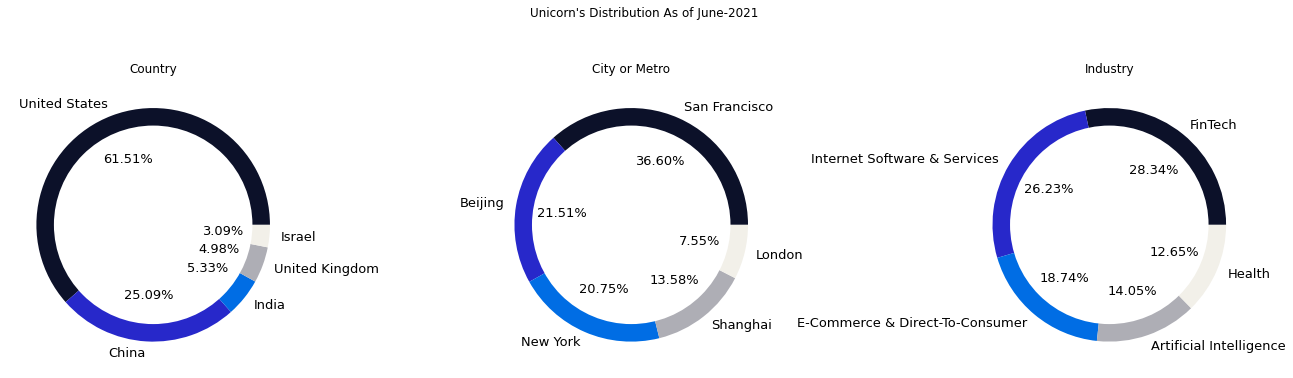

In [49]:
fig, axes = plt.subplots(ncols = 3, figsize = (18, 5))
fig.suptitle("Unicorn's Distribution As of June-2021", 
             fontdict = dict(fontsize = 18, weight = 'bold'), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["Country", "City or Metro", "Industry"], [unicorn_df.country.value_counts()[:5], unicorn_df.city_or_metro.value_counts()[:5], unicorn_df.industry.value_counts()[:5]]):
    circle_centre = plt.Circle(xy = (0, 0), radius = 0.85, fc = "white")
    curr_axis.pie(curr_data, 
                  labels = curr_data.index, 
                  autopct = "%0.2f%%", 
                  colors = pie_color_palette, 
                  textprops = dict(fontsize = 13))
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
    curr_axis.add_artist(circle_centre)
fig.tight_layout()
sns.despine()

In [31]:
us_startup_df = startup_df.loc[startup_df.country == "United States"].reset_index(drop = True)
us_startup_df.head()

company_name  valuation_billion_dollars joined_date        country  \
0       Stripe                       95.0  2014-01-23  United States   
1       SpaceX                       74.0  2012-12-01  United States   
2    Instacart                       39.0  2014-12-30  United States   
3   Epic Games                       28.7  2018-10-26  United States   
4   Databricks                       28.0  2019-02-05  United States   

   city_or_metro                             industry  \
0  San Francisco                              FinTech   
1      Hawthorne                                Other   
2  San Francisco  Supply Chain, Logistics, & Delivery   
3           Cary                                Other   
4  San Francisco          Data Management & Analytics   

                                       top_investors  joined_year  \
0        Khosla Ventures, LowercaseCapital, capitalG         2014   
1  Founders Fund, Draper Fisher Jurvetson, Rothen...         2012   
2  Khosla Ventures, Kleiner Perkins Caufield & By...         2014   
3              Tencent Holdings, KKR, Smash Ventures         2018   
4  Andreessen Horowitz, New Enterprise Associates...         2019   

  startup_category  
0         Decacorn  
1         Decacorn  
2         Decacorn  
3         Decacorn  
4         Decacorn

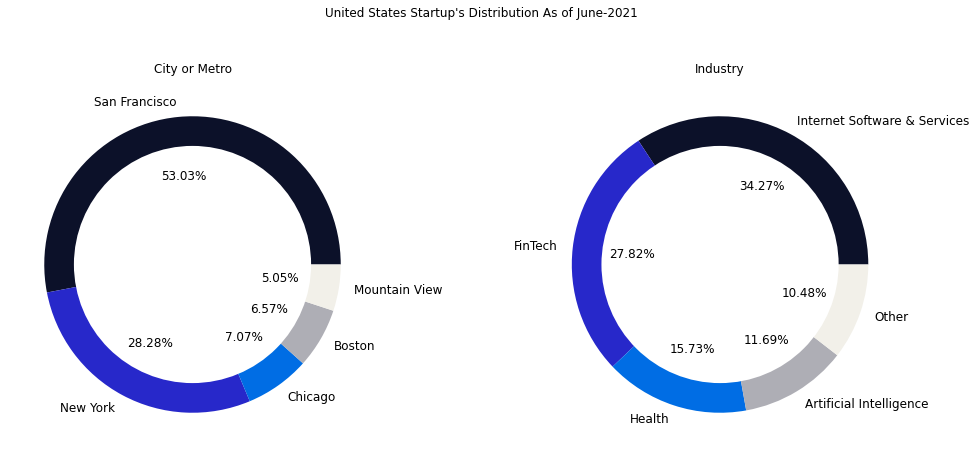

In [32]:
fig, axes = plt.subplots(ncols = 2, figsize = (15, 6))
fig.suptitle("United States Startup's Distribution As of June-2021", fontdict = dict(fontsize = 18, weight = 'bold'), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["City or Metro", "Industry"], [us_startup_df.city_or_metro.value_counts()[:5], us_startup_df.industry.value_counts()[:5]]):
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.80, fc = 'white')
    curr_axis.pie(curr_data, labels = curr_data.index, autopct = "%0.2f%%", colors = pie_color_palette, textprops = dict(fontsize = 12))
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
    curr_axis.add_artist(centre_circle)
fig.tight_layout()
sns.despine()

In [33]:
china_startup_df = startup_df.loc[startup_df.country == "China"].reset_index(drop = True)
china_startup_df.head()

company_name  valuation_billion_dollars joined_date country  \
0             Bytedance                      140.0  2017-04-07   China   
1             Yuanfudao                       15.5  2017-05-31   China   
2       DJI Innovations                       15.0  2015-01-23   China   
3                 SHEIN                       15.0  2018-07-03   China   
4  Bitmain Technologies                       12.0  2018-07-06   China   

  city_or_metro                         industry  \
0       Beijing          Artificial Intelligence   
1       Beijing                           EdTech   
2      Shenzhen                         Hardware   
3      Shenzhen  E-Commerce & Direct-To-Consumer   
4       Beijing                         Hardware   

                                       top_investors  joined_year  \
0  Sequoia Capital China, SIG Asia Investments, S...         2017   
1       Tencent Holdings, Warbug Pincus, IDG Capital         2017   
2                    Accel Partners, Sequoia Capital         2015   
3  Tiger Global Management, Sequoia Capital China...         2018   
4  Coatue Management, Sequoia Capital China, IDG ...         2018   

  startup_category  
0        Hectocorn  
1         Decacorn  
2         Decacorn  
3         Decacorn  
4         Decacorn

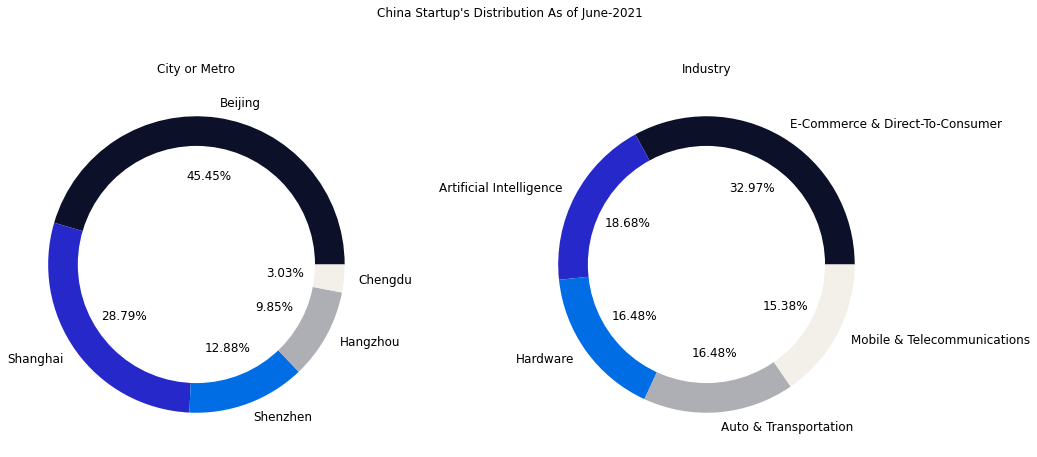

In [34]:
fig, axes = plt.subplots(ncols = 2, figsize = (15, 6))
fig.suptitle("China Startup's Distribution As of June-2021", fontdict = dict(fontsize = 12, weight = 'bold'), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["City or Metro", "Industry"], [china_startup_df.city_or_metro.value_counts()[:5], china_startup_df.industry.value_counts()[:5]]):
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.80, fc = "white")
    curr_axis.pie(curr_data, labels = curr_data.index, autopct = "%0.2f%%", colors = pie_color_palette, textprops = dict(fontsize = 12))
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
    curr_axis.add_artist(centre_circle)
fig.tight_layout()
sns.despine()

In [35]:
india_startup_df = startup_df.loc[startup_df.country == "India"].reset_index(drop = True)
india_startup_df.head()

company_name  valuation_billion_dollars joined_date  \
0                            BYJU's                       16.5  2017-07-25   
1              One97 Communications                       16.0  2015-05-12   
2                         OYO Rooms                        9.0  2018-09-25   
3  National Stock Exchange of India                        6.5  2020-07-01   
4                          Ola Cabs                        6.3  2014-10-27   

  country city_or_metro               industry  \
0   India     Bengaluru                 EdTech   
1   India         Noida                FinTech   
2   India       Gurgaon                 Travel   
3   India        Mumbai                FinTech   
4   India     Bengaluru  Auto & Transportation   

                                       top_investors  joined_year  \
0  Tencent Holdings, Lightspeed India Partners, S...         2017   
1    Intel Capital, Sapphire Ventures, Alibaba Group         2015   
2  SoftBank Group, Sequoia Capital India,Lightspe...         2018   
3           TA Associates, SoftBank Group, GS Growth         2020   
4    Accel Partners, SoftBank Group, Sequoia Capital         2014   

  startup_category  
0         Decacorn  
1         Decacorn  
2          Unicorn  
3          Unicorn  
4          Unicorn

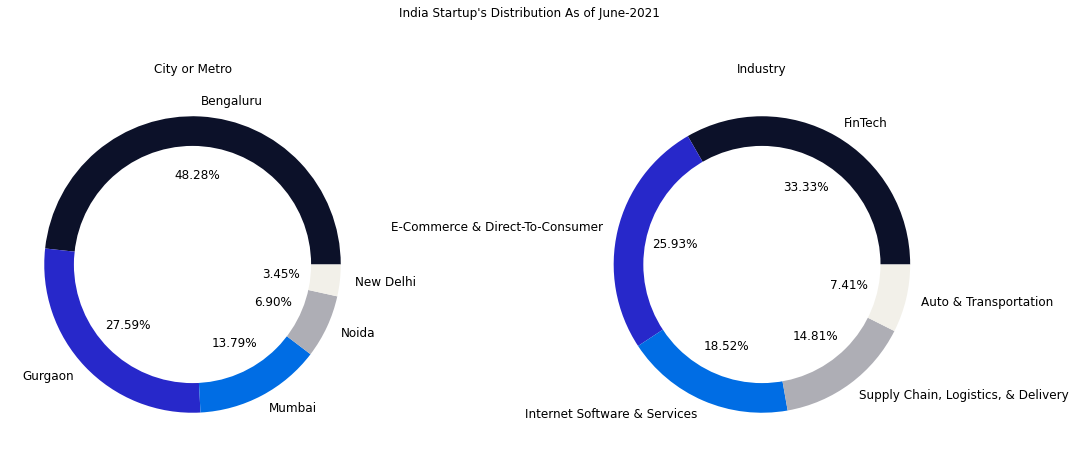

In [36]:
fig, axes = plt.subplots(ncols = 2, figsize = (15, 6))
fig.suptitle("India Startup's Distribution As of June-2021", fontdict = dict(fontsize = 12, weight = "bold"), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["City or Metro", "Industry"], [india_startup_df.city_or_metro.value_counts()[:5], india_startup_df.industry.value_counts()[:5]]):
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.80, fc = "white")
    curr_axis.pie(curr_data, labels = curr_data.index, autopct = "%0.2f%%", colors = pie_color_palette, textprops = dict(fontsize = 12))
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
    curr_axis.add_artist(centre_circle)
fig.tight_layout()
sns.despine()

In [37]:
uk_startup_df = startup_df.loc[startup_df.country == "United Kingdom"].reset_index(drop = True)
uk_startup_df.head()

company_name  valuation_billion_dollars joined_date         country  \
0    Checkout.com                      15.00  2019-05-02  United Kingdom   
1   Global Switch                      11.10  2016-12-22  United Kingdom   
2           Hopin                       5.65  2020-11-10  United Kingdom   
3         Revolut                       5.50  2018-04-26  United Kingdom   
4  Blockchain.com                       5.20  2021-02-17  United Kingdom   

  city_or_metro                      industry  \
0        London                       FinTech   
1        London                      Hardware   
2        London  Internet Software & Services   
3        London                       FinTech   
4        London                       FinTech   

                                       top_investors  joined_year  \
0  Tiger Global Management, Insight Partners, DST...         2019   
1  Aviation Industry Corporation of China, Essenc...         2016   
2  Accel, Northzone Ventures, Institutional Ventu...         2020   
3         index Ventures, DST Global, Ribbit Capital         2018   
4  Lightspeed Venture Partners, Google Ventures, ...         2021   

  startup_category  
0         Decacorn  
1         Decacorn  
2          Unicorn  
3          Unicorn  
4          Unicorn

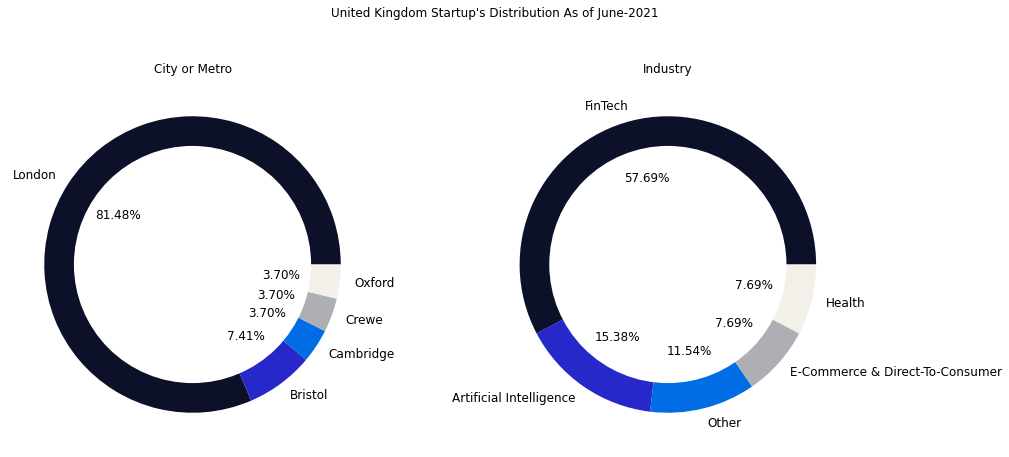

In [38]:
fig, axes = plt.subplots(ncols = 2, figsize = (15, 6))
fig.suptitle("United Kingdom Startup's Distribution As of June-2021", fontdict = dict(fontsize = 12, weight = "bold"), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["City or Metro", "Industry"], [uk_startup_df.city_or_metro.value_counts()[:5], uk_startup_df.industry.value_counts()[:5]]):
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.80, fc = "white")
    curr_axis.pie(curr_data, labels = curr_data.index, autopct = "%0.2f%%", colors = pie_color_palette, textprops = dict(fontsize = 12))
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
    curr_axis.add_artist(centre_circle)
fig.tight_layout()
sns.despine()

In [39]:
israel_startup_df = startup_df.loc[startup_df.country == "Israel"].reset_index(drop = True)
israel_startup_df.head()

company_name  valuation_billion_dollars joined_date country  \
0  Transmit Security                       2.74  2021-06-22  Israel   
1             Earnix                       2.00  2021-02-21  Israel   
2                Wiz                       1.70  2021-03-17  Israel   
3               Gett                       1.50  2016-05-24  Israel   
4         ironSource                       1.50  2014-08-11  Israel   

  city_or_metro                     industry  \
0      Tel Aviv                Cybersecurity   
1    Giv'atayim                      FinTech   
2      Tel Aviv                Cybersecurity   
3      Tel Aviv        Auto & Transportation   
4      Tel Aviv  Mobile & Telecommunications   

                                       top_investors  joined_year  \
0  General Atlantic, Insight Partners, Vintage In...         2021   
1  Jerusalem Venture Partners, Israel Growth Part...         2021   
2  Insight Partners, Sequoia Capital, Index Ventures         2021   
3  Volkswagen, Access Industries, Vostok New Vent...         2016   
4  Access Industries, Clal Industries and Investm...         2014   

  startup_category  
0          Unicorn  
1          Unicorn  
2          Unicorn  
3          Unicorn  
4          Unicorn

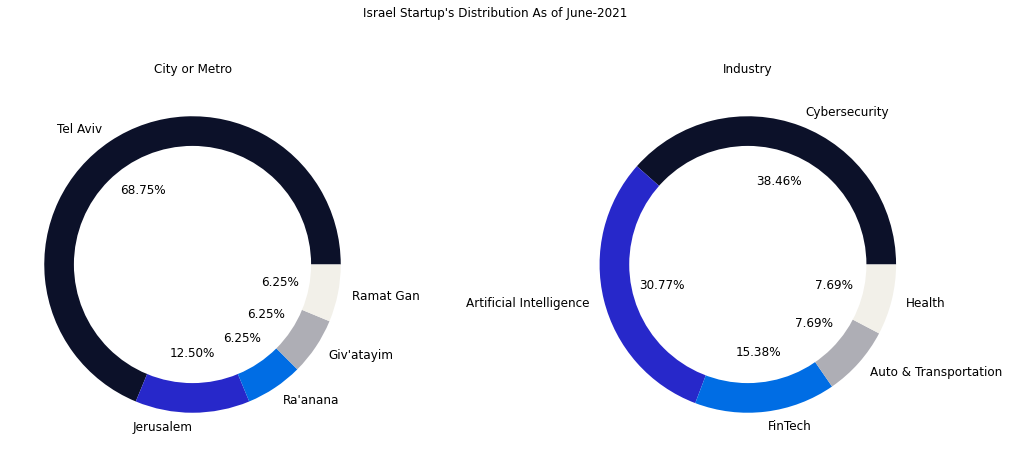

In [40]:
fig, axes = plt.subplots(ncols = 2, figsize = (15, 6))
fig.suptitle("Israel Startup's Distribution As of June-2021", fontdict = dict(fontsize = 12, weight = "bold"), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["City or Metro", "Industry"], [israel_startup_df.city_or_metro.value_counts()[:5], israel_startup_df.industry.value_counts()[:5]]):
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.80, fc = "white")
    curr_axis.pie(curr_data, 
                  labels = curr_data.index, 
                  autopct = "%0.2f%%", 
                  colors = pie_color_palette, 
                  textprops = dict(fontsize = 12))
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
    curr_axis.add_artist(centre_circle)
fig.tight_layout()
sns.despine()

In [41]:
decacorn_df = startup_df.loc[startup_df.startup_category == "Decacorn"].reset_index(drop = True)
decacorn_df.head()

company_name  valuation_billion_dollars joined_date        country  \
0       Stripe                       95.0  2014-01-23  United States   
1       SpaceX                       74.0  2012-12-01  United States   
2       Klarna                       45.6  2011-12-12         Sweden   
3    Instacart                       39.0  2014-12-30  United States   
4       Nubank                       30.0  2018-03-01         Brazil   

   city_or_metro                             industry  \
0  San Francisco                              FinTech   
1      Hawthorne                                Other   
2      Stockholm                              FinTech   
3  San Francisco  Supply Chain, Logistics, & Delivery   
4      Sao Paulo                              FinTech   

                                       top_investors  joined_year  \
0        Khosla Ventures, LowercaseCapital, capitalG         2014   
1  Founders Fund, Draper Fisher Jurvetson, Rothen...         2012   
2  Institutional Venture Partners, Sequoia Capita...         2011   
3  Khosla Ventures, Kleiner Perkins Caufield & By...         2014   
4  Sequoia Capital, Redpoint e.ventures, Kaszek V...         2018   

  startup_category  
0         Decacorn  
1         Decacorn  
2         Decacorn  
3         Decacorn  
4         Decacorn

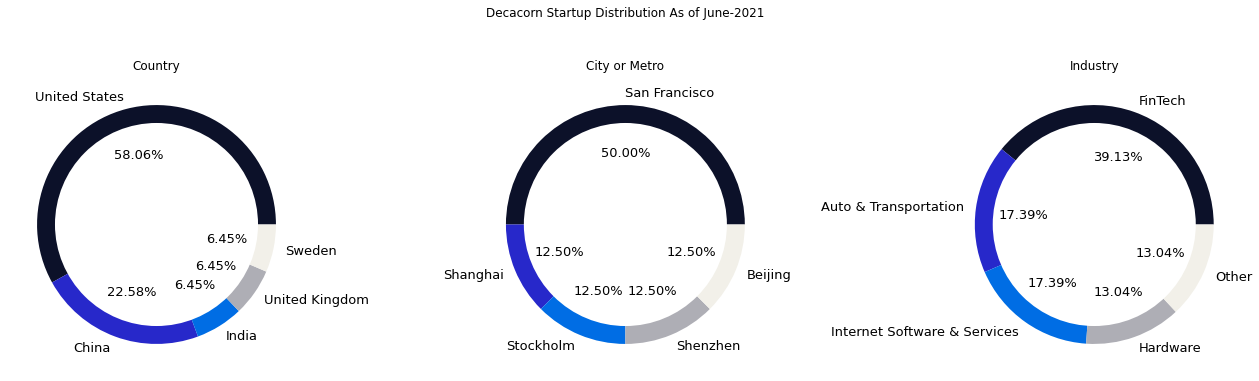

In [48]:
fig, axes = plt.subplots(ncols = 3, figsize = (18, 5))
fig.suptitle("Decacorn Startup Distribution As of June-2021", 
             fontdict = dict(fontsize = 18, weight = 'bold'), y = 1.05)
for curr_axis, curr_title, curr_data in zip(axes, ["Country", "City or Metro", "Industry"], [decacorn_df.country.value_counts()[:5], decacorn_df.city_or_metro.value_counts()[:5], decacorn_df.industry.value_counts()[:5]]):
    centre_circle = plt.Circle(xy = (0, 0), radius = 0.85, fc = "white")
    curr_axis.pie(curr_data, 
                  labels = curr_data.index, 
                  autopct = "%0.2f%%", 
                  colors = pie_color_palette, 
                  textprops = dict(fontsize = 13))
    curr_axis.add_artist(centre_circle)
    curr_axis.set_title(curr_title, fontdict = dict(fontsize = 12))
fig.tight_layout()
sns.despine()

In [43]:
decacorn_treemap_plot = px.treemap(decacorn_df, 
                                   path = [px.Constant("World"), 'country', 'city_or_metro', 'industry', 'company_name'], 
                                   values = 'valuation_billion_dollars', 
                                   color = 'valuation_billion_dollars', 
                                   title = "Decacorn's As of June-2021 By Geography",
                                   color_continuous_scale = 'RdBu', 
                                   template = 'plotly_white')
decacorn_treemap_plot.update_traces(hovertemplate = None)
decacorn_treemap_plot.update_layout(margin = dict(l = 25, r = 25), 
                                    uniformtext = dict(minsize = 10), 
                                    coloraxis_colorbar = dict(title = "Valuation"))
decacorn_treemap_plot.show()

In [44]:
decacorn_industrywise_stats = decacorn_df.groupby(by = ['industry'])['valuation_billion_dollars'].sum().sort_values(ascending = False)

decacorn_industrywise_plot = px.bar(x = decacorn_industrywise_stats.index, 
                                    y = decacorn_industrywise_stats, 
                                    text = decacorn_industrywise_stats,
                                    title = "Decacorn's Valuation By Industry As of June-2021", 
                                    labels = dict(x = "Industry/Sector", y = "Total Valuation (Billion $)"), 
                                    template = "plotly_white", 
                                    height = 600)
decacorn_industrywise_plot.update_traces(marker_color = "rgb(55, 83, 109)", 
                                         hovertemplate = None, 
                                         hoverinfo = "skip",
                                         texttemplate = "$%{text: 0.3s}B", 
                                         textposition = "outside")
decacorn_industrywise_plot.update_layout(xaxis_tickangle = -45)
decacorn_industrywise_plot.show()

In [45]:
decacorn_treemap_industry_plot = px.treemap(decacorn_df, 
                                            path = [px.Constant("World"), 'industry', 'company_name'], 
                                            values = 'valuation_billion_dollars', 
                                            color = 'valuation_billion_dollars', 
                                            title = "Decacorn's As of June-2021 By Industry", 
                                            color_continuous_scale = 'RdBu', 
                                            template = 'plotly_white')
decacorn_treemap_industry_plot.update_traces(hovertemplate = None)
decacorn_treemap_industry_plot.update_layout(margin = dict(l = 25, r = 25), 
                                             uniformtext = dict(minsize = 10), 
                                             coloraxis_colorbar = dict(title = "Valuation"))
decacorn_treemap_industry_plot.show()